In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_df = pd.read_csv('Logistic_X_Train.csv')
y_df = pd.read_csv('Logistic_Y_Train.csv')

print(x_df.shape,y_df.shape)

(2250, 2) (2250, 1)


In [3]:
x_train = x_df.values
y_train = y_df.values

y = y_train.reshape((2250,))

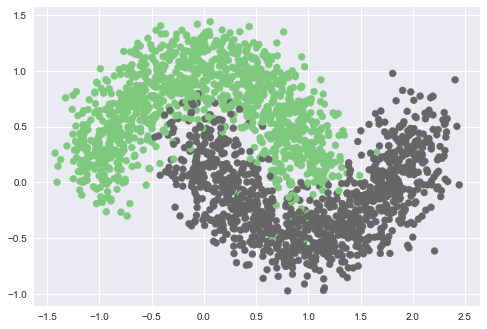

In [4]:
plt.style.use('seaborn')
plt.scatter(x_train[:,0], x_train[:,1],  c = y, cmap = plt.cm.Accent)
plt.show()

In [5]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans


In [6]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [7]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [8]:
X,Y = x_train,y_train

In [9]:
model  = NeuralNetwork(input_size=2,layers=[10,7,5,3],output_size=2)

In [10]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [11]:
losses = train(X,Y,model,700,0.00001)

Epoch 0 Loss 1.6000
Epoch 1 Loss 1.5585
Epoch 2 Loss 1.5146
Epoch 3 Loss 1.4687
Epoch 4 Loss 1.4218
Epoch 5 Loss 1.3752
Epoch 6 Loss 1.3305
Epoch 7 Loss 1.2891
Epoch 8 Loss 1.2520
Epoch 9 Loss 1.2196
Epoch 10 Loss 1.1916
Epoch 11 Loss 1.1675
Epoch 12 Loss 1.1467
Epoch 13 Loss 1.1285
Epoch 14 Loss 1.1122
Epoch 15 Loss 1.0975
Epoch 16 Loss 1.0837
Epoch 17 Loss 1.0707
Epoch 18 Loss 1.0581
Epoch 19 Loss 1.0457
Epoch 20 Loss 1.0335
Epoch 21 Loss 1.0212
Epoch 22 Loss 1.0089
Epoch 23 Loss 0.9965
Epoch 24 Loss 0.9842
Epoch 25 Loss 0.9718
Epoch 26 Loss 0.9595
Epoch 27 Loss 0.9473
Epoch 28 Loss 0.9352
Epoch 29 Loss 0.9233
Epoch 30 Loss 0.9117
Epoch 31 Loss 0.9004
Epoch 32 Loss 0.8895
Epoch 33 Loss 0.8789
Epoch 34 Loss 0.8687
Epoch 35 Loss 0.8590
Epoch 36 Loss 0.8497
Epoch 37 Loss 0.8409
Epoch 38 Loss 0.8325
Epoch 39 Loss 0.8246
Epoch 40 Loss 0.8172
Epoch 41 Loss 0.8102
Epoch 42 Loss 0.8036
Epoch 43 Loss 0.7975
Epoch 44 Loss 0.7918
Epoch 45 Loss 0.7864
Epoch 46 Loss 0.7815
Epoch 47 Loss 0.7768
Ep

Epoch 409 Loss 0.6932
Epoch 410 Loss 0.6932
Epoch 411 Loss 0.6932
Epoch 412 Loss 0.6932
Epoch 413 Loss 0.6932
Epoch 414 Loss 0.6932
Epoch 415 Loss 0.6932
Epoch 416 Loss 0.6932
Epoch 417 Loss 0.6932
Epoch 418 Loss 0.6932
Epoch 419 Loss 0.6932
Epoch 420 Loss 0.6932
Epoch 421 Loss 0.6932
Epoch 422 Loss 0.6932
Epoch 423 Loss 0.6932
Epoch 424 Loss 0.6932
Epoch 425 Loss 0.6932
Epoch 426 Loss 0.6932
Epoch 427 Loss 0.6932
Epoch 428 Loss 0.6932
Epoch 429 Loss 0.6932
Epoch 430 Loss 0.6932
Epoch 431 Loss 0.6932
Epoch 432 Loss 0.6932
Epoch 433 Loss 0.6932
Epoch 434 Loss 0.6932
Epoch 435 Loss 0.6932
Epoch 436 Loss 0.6932
Epoch 437 Loss 0.6932
Epoch 438 Loss 0.6932
Epoch 439 Loss 0.6932
Epoch 440 Loss 0.6932
Epoch 441 Loss 0.6932
Epoch 442 Loss 0.6932
Epoch 443 Loss 0.6932
Epoch 444 Loss 0.6932
Epoch 445 Loss 0.6932
Epoch 446 Loss 0.6932
Epoch 447 Loss 0.6932
Epoch 448 Loss 0.6932
Epoch 449 Loss 0.6932
Epoch 450 Loss 0.6932
Epoch 451 Loss 0.6932
Epoch 452 Loss 0.6932
Epoch 453 Loss 0.6932
Epoch 454 

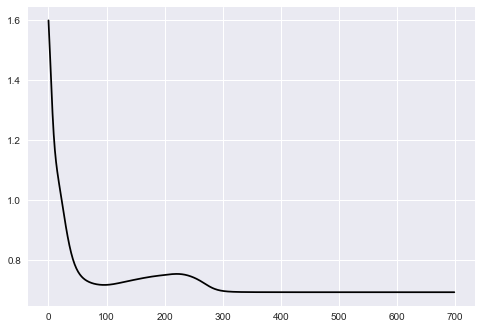

In [13]:
plt.plot(losses,color = 'black')
plt.show()

In [14]:
x_df = pd.read_csv('Logistic_X_Test.csv')

In [15]:
x_test = x_df.values

In [16]:
output = model.predict(x_test)

In [17]:
y_test = output

In [18]:
output = pd.DataFrame(output, columns=['label'])

In [19]:
output.to_csv('outputfile.csv', index=False, index_label=False)

In [20]:
output

label
0        1
1        0
2        1
3        0
4        1
..     ...
745      0
746      0
747      0
748      0
749      0

[750 rows x 1 columns]

In [21]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(x_train,y,model))
print("Test Acc %.4f"%getAccuracy(x_test,y_test,model))

Train Acc 0.7107
Test Acc 1.0000


In [22]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,